# Challenge: http://www.pythonchallenge.com/pc/return/evil.html

In [19]:
%matplotlib inline
import requests
from IPython.display import Image, HTML
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as PILImage

In [2]:
url = 'http://www.pythonchallenge.com/pc/return/{}'
# Use the username and password from challenge 8
auth = ('huge', 'file')
r = requests.get(url.format('evil.html'), auth=auth)
page = r.text
print(page)

<html>
<head>
  <title>dealing evil</title>
  <link rel="stylesheet" type="text/css" href="../style.css">
</head>
<body>
<center>
<img src="evil1.jpg"><br>
</body>
</html>



In [3]:
def download_img(name):
    imgpath = 'files/{}'.format(name)
    r = requests.get(url.format(name), auth=auth)
    print("img: {}   status code: {}".format(name, r.status_code))
    if r.status_code == 200:
        with open(imgpath, 'wb') as f:
            for chunk in r:
                f.write(chunk)
        return imgpath

img: evil1.jpg   status code: 200


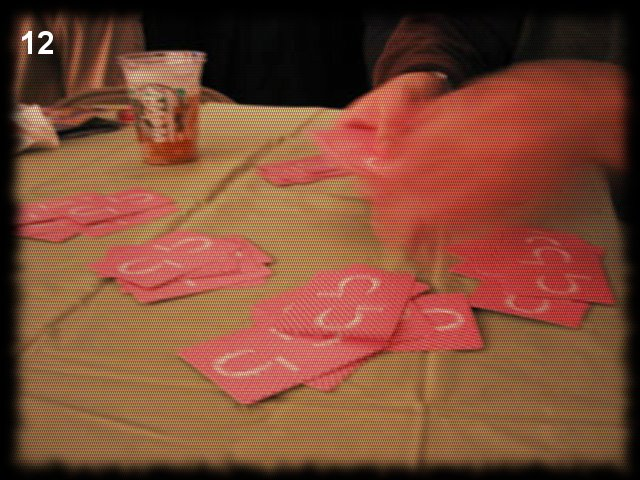

In [4]:
Image(download_img('evil1.jpg'))

img: evil2.jpg   status code: 200


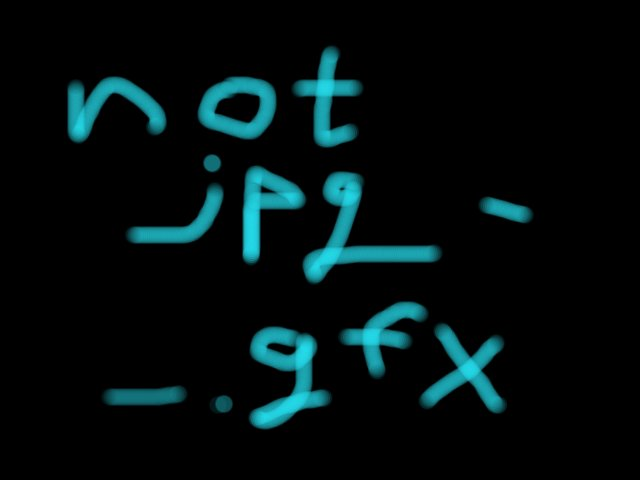

In [5]:
Image(download_img('evil2.jpg'))

img: evil3.jpg   status code: 200


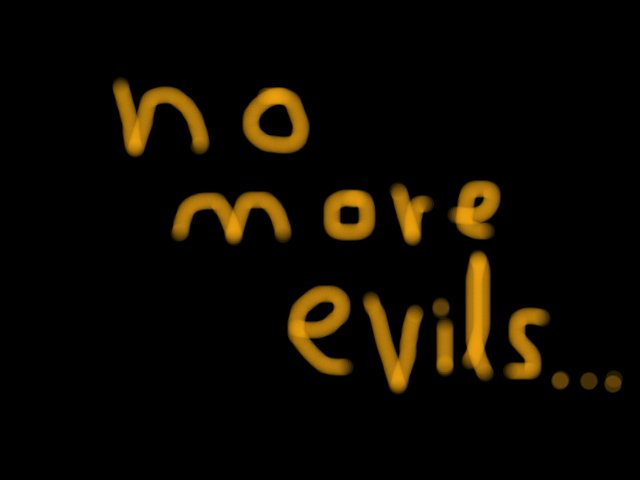

In [6]:
Image(download_img('evil3.jpg'))

In [7]:
with open(download_img('evil4.jpg'), 'rb') as f:
    print(f.read())

img: evil4.jpg   status code: 200
b'Bert is evil! go back!\n'


In [8]:
print(url.format('bert.html'))

http://www.pythonchallenge.com/pc/return/bert.html


In [9]:
r = requests.get(url.format('bert.html'), auth=auth)
print(r.text)

<html>
<bodY bgcolor="black">
<font color="red">
<center>
<br>
<br><b>Yes! Bert is evil!
<br><br>
<img src="bert.gif"/>
<br>
</body>
</html>



In [10]:
download_img('bert.gif')

img: bert.gif   status code: 200


'files/bert.gif'

![](files/bert.gif)

In [11]:
fname = download_img('evil2.gfx')

img: evil2.gfx   status code: 200


In [12]:
with open(fname, 'rb') as f:
    evil = f.read()

Seems to be numbers. Might be RGB triplets.

In [13]:
print(evil[1])

137


In [14]:
(len(evil) - 2)/3

22524.333333333332

In [15]:
evil_img = np.array([int(byte) for byte in evil], dtype=np.uint8)

In [16]:
w = np.arange(2, 1000)

In [17]:
x, y = np.meshgrid(w, w)

In [198]:
size = x*y

In [199]:
size

array([[     4,      6,      8, ...,   1994,   1996,   1998],
       [     6,      9,     12, ...,   2991,   2994,   2997],
       [     8,     12,     16, ...,   3988,   3992,   3996],
       ..., 
       [  1994,   2991,   3988, ..., 994009, 995006, 996003],
       [  1996,   2994,   3992, ..., 995006, 996004, 997002],
       [  1998,   2997,   3996, ..., 996003, 997002, 998001]])

In [215]:
x[size == len(evil)], y[size == len(evil)]

(array([901, 795, 425, 265, 255, 159,  85,  75]),
 array([ 75,  85, 159, 255, 265, 425, 795, 901]))

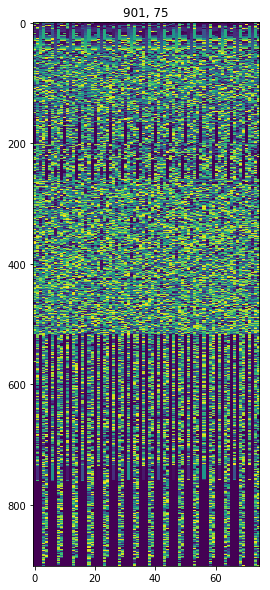

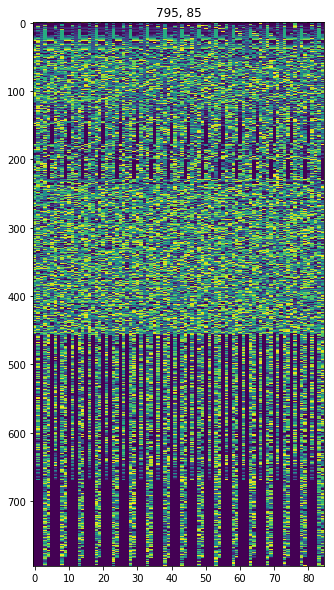

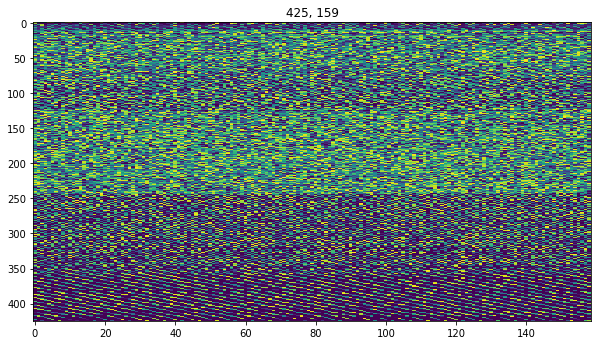

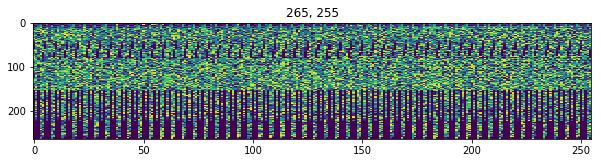

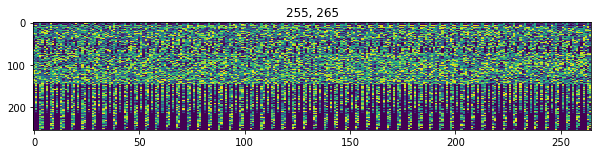

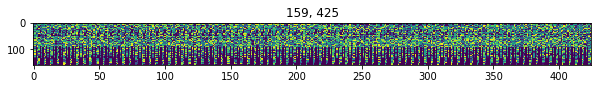

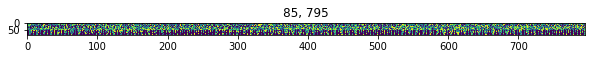

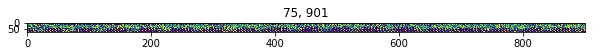

In [217]:
for nx, ny in zip(x[size == len(evil)], y[size == len(evil)]):
    plt.figure(figsize=(10,10))
    plt.title("{}, {}".format(nx, ny))
    plt.imshow(evil_img.reshape((nx, ny))[:, :], aspect=0.2)

In [221]:
nx, ny = shape = (255, 265)
bla = np.empty(shape, dtype=np.uint8)
for i in range(nx):
    bla[i, :] = evil_img[i*ny:(i + 1)*ny]


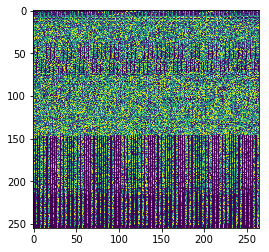

In [222]:
plt.imshow(bla)

In [49]:
evil_img.size

67575

In [51]:
evil_img.size/3

22525.0

In [23]:
np.sqrt(22525)

150.08331019803634

In [44]:
155*144

22320

In [178]:
bert = io.imread('files/bert.gif')

In [181]:
bert.shape

(223, 194)

In [193]:
bert.size

43262

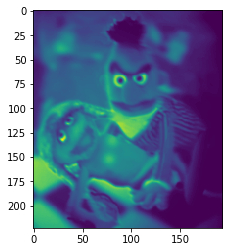

In [179]:
plt.imshow(bert)

In [23]:
bert = PILImage.open('files/bert.gif')

In [21]:
bert._

{'background': 0, 'version': b'GIF87a'}